In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier1.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier1.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.8, random_state=RANDOM_SEED)

# Model building

In [7]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 512)               22016     
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 26)                6682      
                                                                 
Total params: 160,026
Trainable params: 160,026
Non-trainable params: 0
_________________________________________________________________


In [164]:
# tf.keras.utils.plot_model(model, show_shapes=True)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

In [44]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [14]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test)
)

Epoch 1/100
53/53 [==============================] - 2s 9ms/step - loss: 2.6038 - accuracy: 0.2779 - val_loss: 1.7941 - val_accuracy: 0.5326
Epoch 2/100
53/53 [==============================] - 0s 5ms/step - loss: 1.6294 - accuracy: 0.4987 - val_loss: 1.0824 - val_accuracy: 0.7293
Epoch 3/100
53/53 [==============================] - 0s 5ms/step - loss: 1.2635 - accuracy: 0.5996 - val_loss: 0.7620 - val_accuracy: 0.8075
Epoch 4/100
53/53 [==============================] - 0s 4ms/step - loss: 1.0434 - accuracy: 0.6676 - val_loss: 0.5688 - val_accuracy: 0.8596
Epoch 5/100
53/53 [==============================] - 0s 5ms/step - loss: 0.9168 - accuracy: 0.7079 - val_loss: 0.4865 - val_accuracy: 0.8815
Epoch 6/100
53/53 [==============================] - 0s 5ms/step - loss: 0.8349 - accuracy: 0.7200 - val_loss: 0.4023 - val_accuracy: 0.9011
Epoch 7/100
53/53 [==============================] - 0s 4ms/step - loss: 0.7606 - accuracy: 0.7489 - val_loss: 0.3691 - val_accuracy: 0.9064
Epoch 8/100
5

In [45]:
print("Accuracy of the model is - ", model.evaluate(X_test, y_test)[1] * 100, "%")

53/53 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9970
Accuracy of the model is -  99.70378875732422 %


In [38]:
# # Save Model
# model.save(model_save_path, include_optimizer=False)

In [39]:
# # Loading the saved model
# model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 66ms/step
[4.4015469e-06 4.5551037e-06 6.2023655e-06 4.0969647e-02 9.9153556e-07
 1.8531678e-11 2.7098635e-03 1.1740107e-04 1.7767472e-07 1.0461173e-06
 8.8139186e-06 2.5969900e-03 1.5792315e-06 1.0997206e-06 7.2162265e-08
 1.9048324e-05 6.6495333e-05 4.6308202e-04 3.8021390e-05 2.2085898e-03
 7.3604606e-04 6.1314186e-04 9.4794341e-05 8.0725753e-01 3.4643616e-10
 1.4208037e-01]
23


# Model Analysis

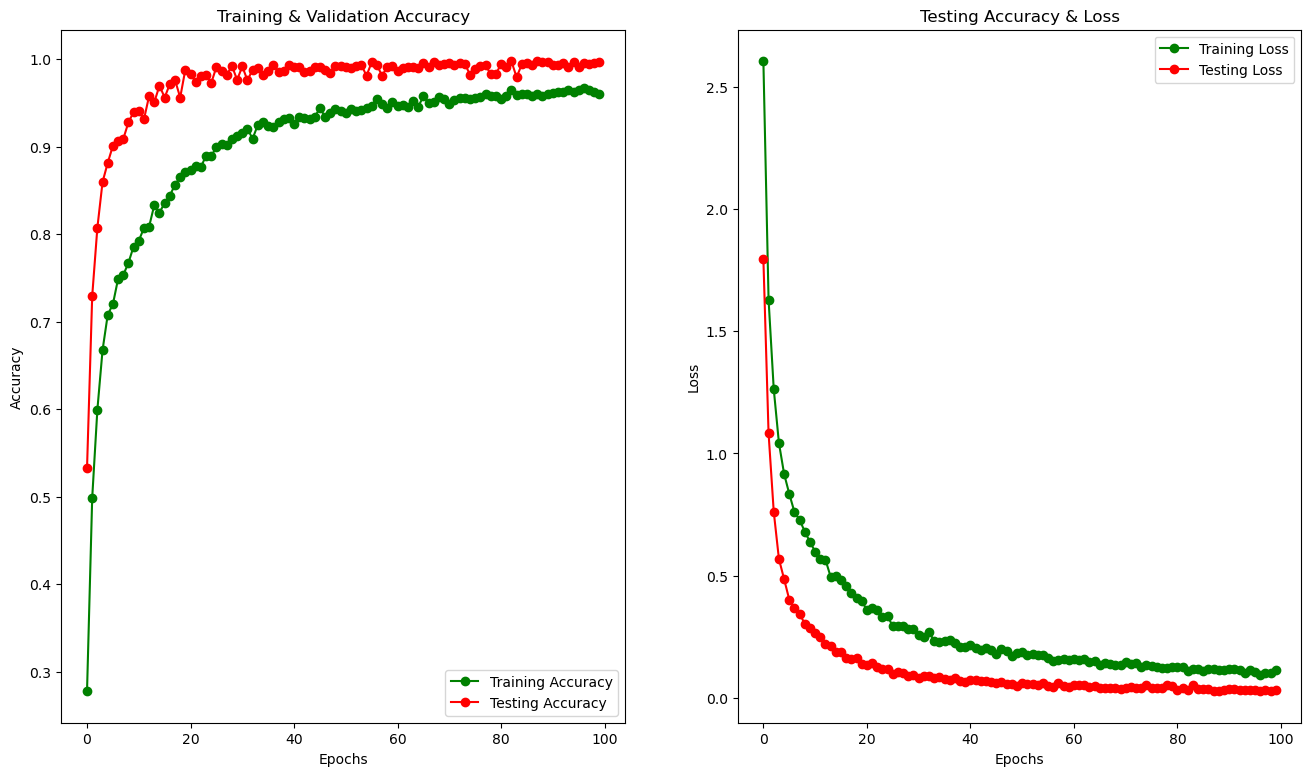

In [47]:
import matplotlib.pyplot as plt
epochs = [i for i in range(100)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
fig.set_size_inches(16, 9)

ax[0].plot(epochs, train_acc, "go-", label="Training Accuracy")
ax[0].plot(epochs, val_acc, "ro-", label="Testing Accuracy")
ax[0].set_title("Training & Validation Accuracy")
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, "g-o", label="Training Loss")
ax[1].plot(epochs, val_loss, "r-o", label="Testing Loss")
ax[1].set_title("Testing Accuracy & Loss")
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

# Confusion matrix

53/53 [==============================] - 0s 2ms/step


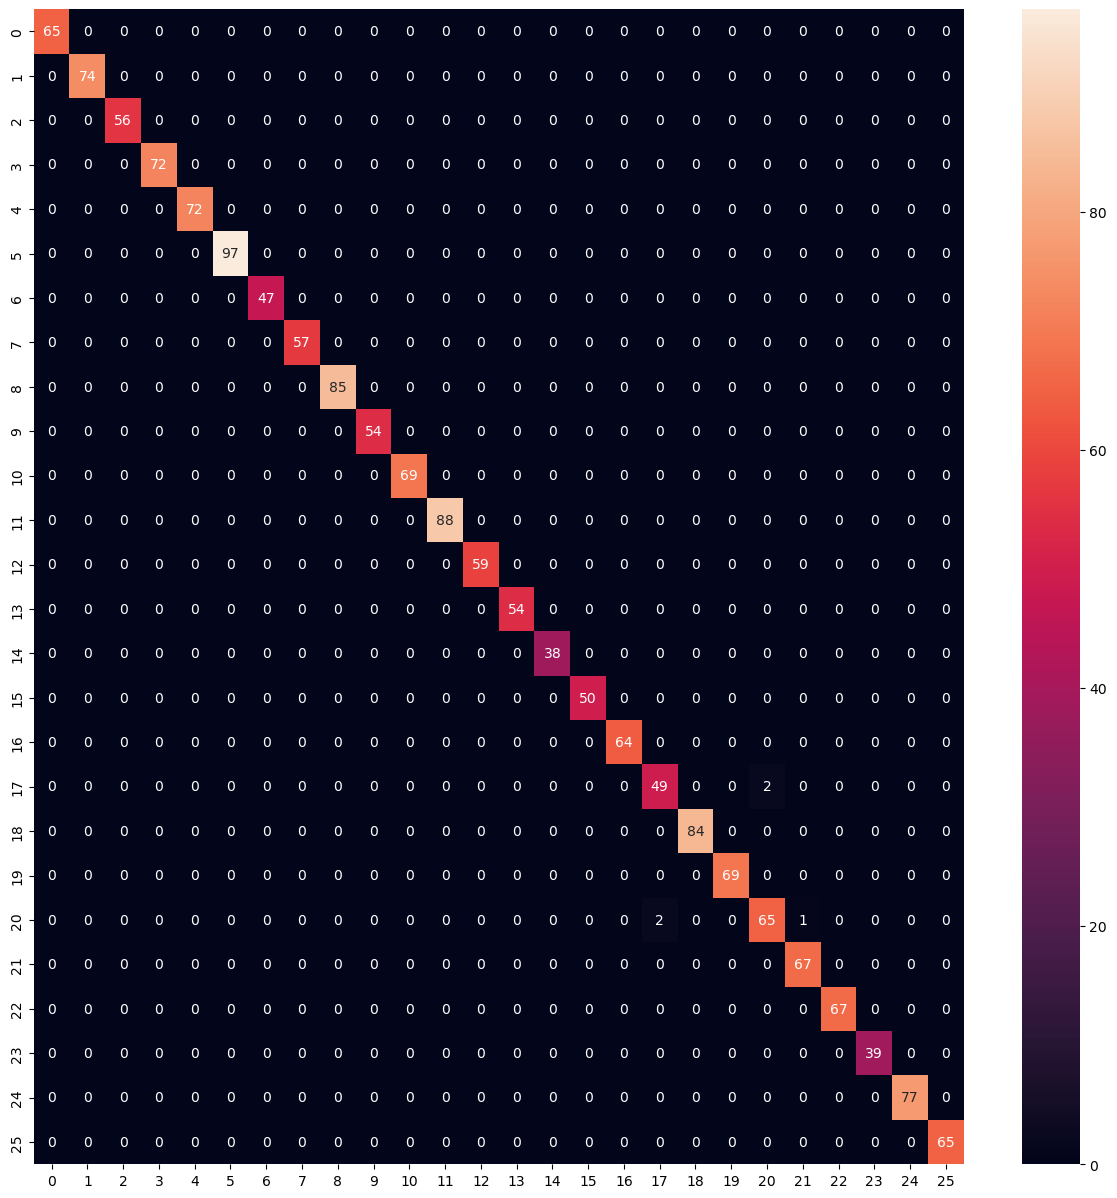

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        72
           4       1.00      1.00      1.00        72
           5       1.00      1.00      1.00        97
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        57
           8       1.00      1.00      1.00        85
           9       1.00      1.00      1.00        54
          10       1.00      1.00      1.00        69
          11       1.00      1.00      1.00        88
          12       1.00      1.00      1.00        59
          13       1.00      1.00      1.00        54
          14       1.00      1.00      1.00        38
          15       1.00      1.00      1.00        50
          16       1.00      1.00      1.00        64
     

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [100]:
def perf_measure(y_test, pred_final):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(pred_final)): 
        if y_test[i]==pred_final[i]==1:
           TP += 1
        if y_test[i]==1 and y_test[i]!=pred_final[i]:
           FP += 1
        if y_test[i]==pred_final[i]==0:
           TN += 1
        if y_test[i]==0 and y_test[i]!=pred_final[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [144]:
tp, fp, tn ,fn = perf_measure(y_test,y_pred)
accuracy  = (tp + tn) / (tp + fp + tn + fn) 
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f_score = (2*precision*recall)/(precision+recall)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F-Score is {:.2f}".format(f_score))

Recall of the model is 1.00
Precision of the model is 1.00
F-Score is 1.00


In [118]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter( y=history.history['val_loss'], name="val loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['loss'], name="train loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['val_accuracy'], name="val accuracy"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter( y=history.history['accuracy'], name="train accuracy"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Loss/Accuracy of Model"
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

fig.show()

In [25]:
import string
def mapper_alphabet():
    nums = [i for i in range(1, 26)]
    alphabet = list(string.ascii_uppercase)
    alphabet.remove("J")
    alphabet.remove("Z")

    mapper = {}
    for num, alpha in zip(nums, alphabet):
        mapper[num] = alpha

    return mapper


In [26]:
import numpy as np
predictions = np.argmax(model.predict(X_test), axis=1)
for i in range(len(predictions)):
    predictions[i] += 1


53/53 [==============================] - 0s 1ms/step


In [28]:
from sklearn.utils import shuffle
import pandas as pd
df_pred_test = pd.DataFrame({"y_pred": predictions, "y_test": y_test})

df_pred_test["correct"] = np.where(
    df_pred_test["y_pred"] == df_pred_test["y_test"], True, False
)

df_pred_test["y_pred"] = df_pred_test["y_pred"].map(mapper_alphabet())
df_pred_test["y_test"] = df_pred_test["y_test"].map(mapper_alphabet())

shuffle(df_pred_test).head()


,y_pred,y_test,correct
382,U,T,False
1112,F,E,False
638,V,U,False
566,M,L,False
1618,T,S,False


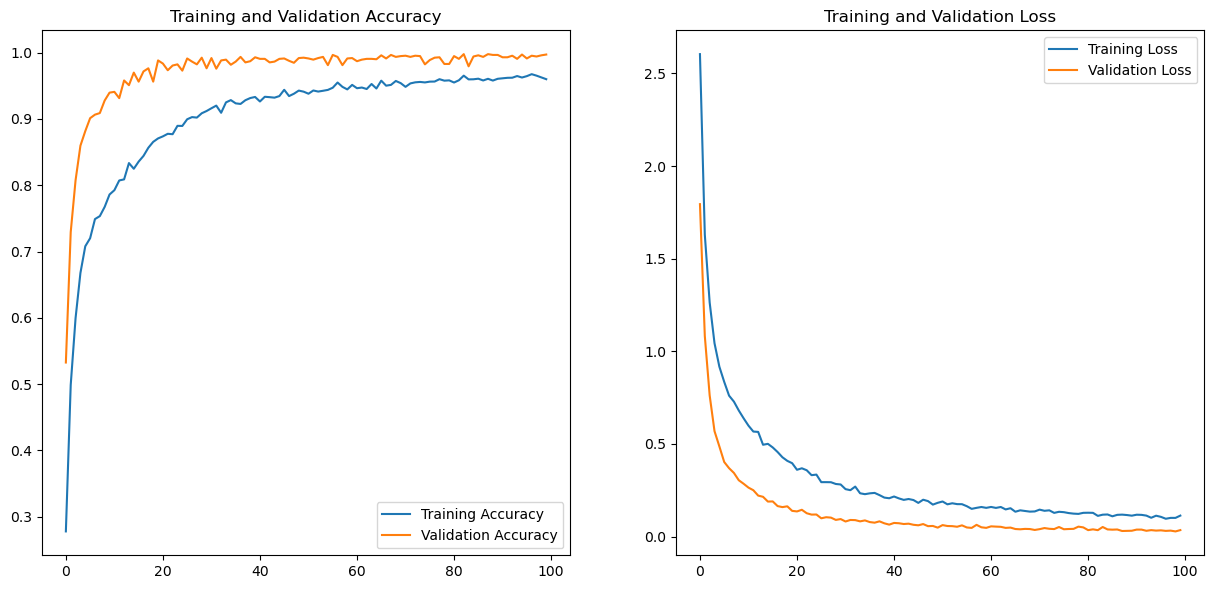

In [20]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Convert to model for Tensorflow-Lite

In [ ]:
# # Save as a model dedicated to inference
# model.save(model_save_path, include_optimizer=False)

In [41]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\rezae\AppData\Local\Temp\tmpqou4_tg8\assets


164672

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 5.19 ms


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.78666879e-07 9.10264532e-07 9.88274769e-06 1.21434905e-01
 1.61669334e-06 2.47473266e-12 2.76285736e-03 4.45069221e-04
 6.28389927e-08 1.70295618e-06 3.50293431e-06 6.18906808e-04
 7.54487246e-06 1.51188999e-06 5.65548248e-07 1.91720246e-05
 1.89821967e-05 3.06524307e-04 1.24062208e-05 1.08622396e-02
 2.91681208e-04 8.53756064e-05 1.31183842e-05 8.48215759e-01
 9.35750505e-11 1.48850232e-02]
23
